In [95]:
import pandas as pd
%matplotlib inline
%pylab inline
import pprint


# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
pylab.rcParams['figure.figsize'] = (20, 10) 

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/ah-bau/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
df = pd.read_csv('./AQdata_clean.csv')
dailyMean = pd.read_csv('./AQdata_dailyMean.csv')
dailyMax = pd.read_csv('./AQdata_dailyMax.csv')

In [41]:
dailyMean = dailyMean.rename(columns={'PT08.S5(O3)': 'AQI'})

In [42]:
train_set = pd.read_csv('./train8160.csv')
test_set = pd.read_csv('./test1197.csv')
train_set.columns

Index(['Unnamed: 0', 'DateTime', 'idx', 'Date', 'Day', 'Hour', 'Weekday',
       'Week', 'Month', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)',
       'NO2(GT)', 'T', 'RH', 'AH'],
      dtype='object')

In [43]:
if 'Unnamed: 0' in train_set.columns:
    train_set = train_set.drop(['Unnamed: 0'], axis=1)

In [47]:
indicators = ['Day', 'Hour', 'Weekday', 'Week', 'Month',
       'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
       'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
related_indi = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'CO(GT)', 'C6H6(GT)',
       'NOx(GT)']

In [44]:
from sklearn.model_selection import train_test_split

def prep_data(df, indi, sizepct):
    if ('PT08.S5(O3)' in df.columns) :
        df = df.rename(columns={'PT08.S5(O3)': 'AQI'})
        X = df[indi].fillna(method = 'ffill')
        y = df['AQI'].fillna(method = 'ffill')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizepct)
        return X_train, X_test, y_train, y_test
    else: 
        print("'PT08.S5(O3)' not in df.columns!")
        return None


(      Day  Hour  Weekday  Week  Month  PT08.S1(CO)  PT08.S2(NMHC)  \
 2251   12    13        5    24      6       1067.0          962.0   
 3603    7    21        5    32      8        954.0          828.0   
 4139   30     5        0    36      8        902.0          706.0   
 7150    2    16        6    53      1       1312.0          998.0   
 706     9     4        4    15      4       1058.0          824.0   
 2377   17    19        3    25      6       1131.0         1194.0   
 5353   19    19        1    43     10       1478.0         1447.0   
 2015    2    17        2    23      6       1010.0          902.0   
 5652    1     6        0    45     11       1061.0          962.0   
 7453   15     7        5     2      1        973.0          728.0   
 2848    7    10        2    28      7       1182.0         1122.0   
 2551   25     1        4    26      6       1035.0         1011.0   
 595     4    13        6    14      4       1160.0          860.0   
 2537   24    11    

In [81]:
X_train, X_def, y_train, y_def = prep_data(train_set, indicators, 0.3)
print("X_train's shape is: ", X_train.shape) #for train
print("y_train's shape is: ", y_train.shape) #for train
print("X_def's shape is: ", X_def.shape) # for predict
print("y_def's shape is: ", y_def.shape) # for score

X_train's shape is:  (5712, 16)
y_train's shape is:  (5712,)
X_def's shape is:  (2448, 16)
y_def's shape is:  (2448,)


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import BayesianRidge
# from sklearn.neural_network import MLPRegressor



def run_models(X_train, X_def, y_train, y_def):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    print('Model_1: LinearRegression, score: ', lin_reg.score(X_def, y_def))
    
    knn = neighbors.KNeighborsRegressor(7)
    knn.fit(X_train, y_train.values.ravel())
    # 使用 fit 來建置模型，其參數接收 training data matrix, defing data array，所以進行 y_train.values.ravel() 轉換
    print('Model_2: KNeighborsRegressor, score:', knn.score(X_def, y_def))
    
    clf = SVR(C = 0.0001, epsilon = 0.5, kernel = 'linear')
    clf.fit(X_train,y_train)
    print('Model_3: SVR, score:', clf.score(X_def, y_def))
    
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    print('Model_4: DecisionTreeRegressor, score:', regressor.score(X_def, y_def))

    regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)
    regr_2.fit(X_train,y_train)
    print('Model_5: AdaBoostRegressor, score:', regr_2.score(X_def, y_def))
    
    clf2 = BayesianRidge(compute_score=True)
    clf2.fit(X_train,y_train)
    print('Model_6: BayesianRidge, score:', clf2.score(X_def, y_def))

In [90]:
#train the test with original train
run_models(X_train, X_def, y_train, y_def)

Model_1: LinearRegression, score:  0.896570751536
Model_2: KNeighborsRegressor, score: 0.924251795781
Model_3: SVR, score: 0.878732064379
Model_4: DecisionTreeRegressor, score: 0.89476508161
Model_5: AdaBoostRegressor, score: 0.897181342619
Model_6: BayesianRidge, score: 0.896271922248


In [91]:
# X_train2, X_test2, y_train2, y_test2 = prep_data(test_set, indicators, 0.3)
#train with 12 month, test with 1 month
run_models(X_train, X_test2, y_train, y_test2)

Model_1: LinearRegression, score:  0.829351503479
Model_2: KNeighborsRegressor, score: 0.80879602987
Model_3: SVR, score: 0.832658368798
Model_4: DecisionTreeRegressor, score: 0.717571383669
Model_5: AdaBoostRegressor, score: 0.762846475042
Model_6: BayesianRidge, score: 0.829546545099


In [92]:
X_train3, X_test3, y_train3, y_test3 = prep_data(train_set, related_indi, 0.1)
run_models(X_train3, X_test3, y_train3, y_test3)

Model_1: LinearRegression, score:  0.862526460113
Model_2: KNeighborsRegressor, score: 0.868929993036
Model_3: SVR, score: 0.855712173111
Model_4: DecisionTreeRegressor, score: 0.787962353725
Model_5: AdaBoostRegressor, score: 0.839840706489
Model_6: BayesianRidge, score: 0.862512961954


In [93]:
run_models(X_train, new_X, y_train, new_y)

Model_1: LinearRegression, score:  0.846465342509
Model_2: KNeighborsRegressor, score: 0.81397985629
Model_3: SVR, score: 0.84508410766
Model_4: DecisionTreeRegressor, score: 0.729386787613
Model_5: AdaBoostRegressor, score: 0.78639214258
Model_6: BayesianRidge, score: 0.846052200008


In [67]:
test_set = test_set.rename(columns={'PT08.S5(O3)': 'AQI'})
new_X = test_set[indicators].fillna(method ='ffill')
new_y = test_set['AQI'].fillna(method ='ffill')

In [68]:
print(new_X.shape, new_y.shape)

(1197, 16) (1197,)


In [21]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[0.0001, 0.01]}
svr = SVR()
clf2 = GridSearchCV(svr, parameters)
clf2.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.0001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
clf2.score(X_test, y_test)
clf2.ge

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.0001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [29]:
clf2.score(X_test, y_test)
clf2.get_params()

{'cv': None,
 'error_score': 'raise',
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'auto',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': True,
 'n_jobs': 1,
 'param_grid': {'C': [0.0001, 0.01], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

0.88664946848412363: SVR(C = 0.01, epsilon = 0.5, kernel = 'linear')

Optimization Finished!
Training cost= 9.8539e+08 W= 43.1356 b= 17.4035 



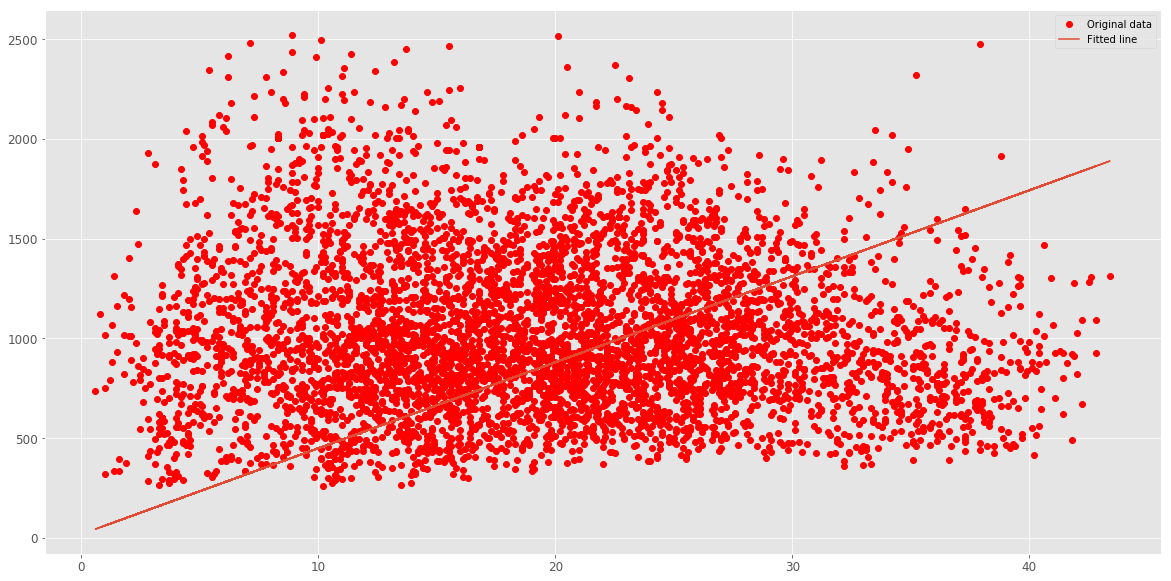

Testing... (Mean square loss Comparison)
Testing cost= 4.17419e+08
Absolute mean square loss difference: 5.67972e+08


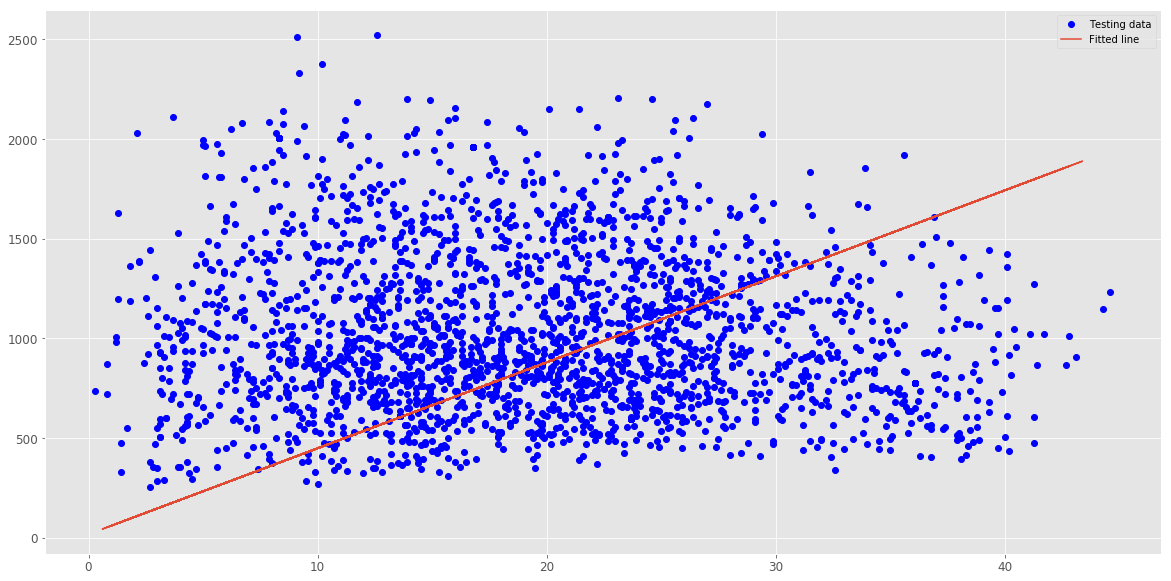

In [26]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 10
display_step = 50

# Training Data
train_X = np.array(X_train)
train_Y = np.array(y_train)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = X_test
    test_Y = y_test

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()